소프트웨어학부 20186663 전찬웅

# code

In [1]:
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
nltk.download('wordnet')
import pickle
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split


review_data = load_files(r"movie_review")
X, y = review_data.data, review_data.target

documents = []

stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
y_train = y_train.reshape((1401,1))
y_test = y_test.reshape((601,1))

[nltk_data] Downloading package stopwords to /home/jeon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jeon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_test))

(1401, 1500)
(601, 1500)
(1401, 1)
(601, 1)


In [25]:
theta1 = np.random.randn(1500,256)
theta2 = np.random.randn(256,64)
theta3 = np.random.randn(64,1)
bias1 = np.random.randn(1,256)
bias2 = np.random.randn(1,64)
bias3 = np.random.randn(1,1)

In [26]:
learning_rate = 0.01
cost_ = []
cost_test_ = []
accuracy = []
test_accuracy = []
lambd = 2
for i in range(20000):
    a=0
    b=0
    Z1 = np.dot(X_train,theta1)+bias1
    A1 = 1/(1+np.exp(-Z1))
    Z2 = np.dot(A1,theta2)+bias2
    A2 = 1/(1+np.exp(-Z2))
    Z3 = np.dot(A2,theta3)+bias3
    A3 = 1/(1+np.exp(-Z3))
    bias1=bias1[0][:]
    bias2=bias2[0][:]
    bias3=bias3[0][:]
    Z1_test = np.dot(X_test,theta1)+bias1
    A1_test = 1/(1+np.exp(-Z1_test))
    Z2_test = np.dot(A1_test,theta2)+bias2
    A2_test = 1/(1+np.exp(-Z2_test))
    Z3_test = np.dot(A2_test,theta3)+bias3
    A3_test = 1/(1+np.exp(-Z3_test))
    cost = (-y_train*np.log(A3)-(1-y_train)*np.log(1-A3)).sum()/len(X_train)+(np.sum(np.square(theta1))+np.sum(np.square(theta2))+np.sum(np.square(theta3)))*lambd/2/len(X_train)
    cost_.append(cost)
    cost_test = (-y_test*np.log(A3_test)-(1-y_test)*np.log(1-A3_test)).sum()/len(X_test)
    cost_test_.append(cost_test)
    for j in range(len(X_train)):
        if np.round(A3[j])==y_train[j]:
            a+=1.0
    for j in range(len(X_test)):
        if np.round(A3_test[j])==y_test[j]:
            b+=1.0
    accuracy.append(a*100/len(X_train))
    test_accuracy.append(b*100/len(X_test))
    dL_dZ3 = A3-y_train                               #(m,1)
    dZ3_dtheta3 = A2                                  #(m,64)
    dZ3_dbias3 = 1                                    #(1,1)
    dZ3_dA2 = theta3                                  #(64,1)
    dA2_dZ2 = 1/(1+np.exp(-Z2))*(1-1/(1+np.exp(-Z2))) #(m,64)
    dZ2_dtheta2 = A1                                  #(m,256)
    dZ2_dbias2 = 1                                    #(1,1)
    dZ2_dA1 = theta2                                  #(256,64)
    dA1_dZ1 = 1/(1+np.exp(-Z1))*(1-1/(1+np.exp(-Z1))) #(m,256)
    dZ1_dtheta1 = X_train                             #(m,784)
    dZ1_dbias1 = 1                                    #(1,1)
    dtheta3 = np.dot(dZ3_dtheta3.T,dL_dZ3)+theta3*lambd/len(X_train)
    dbias3 = dL_dZ3
    dtheta2 = np.dot(dZ2_dtheta2.T, dA2_dZ2*np.dot(dL_dZ3,dZ3_dA2.T))+theta2*lambd/len(X_train)
    dbias2 = dA2_dZ2*np.dot(dL_dZ3,dZ3_dA2.T)
    dtheta1 = np.dot(dZ1_dtheta1.T, dA1_dZ1*np.dot(dL_dZ3, np.dot(dZ3_dA2.T,dZ2_dA1.T)))+theta1*lambd/len(X_train)
    dbias1 = dA1_dZ1*np.dot(dL_dZ3, np.dot(dZ3_dA2.T,dZ2_dA1.T))
    theta3 = theta3-learning_rate*dtheta3/len(X_train)
    bias3 = bias3-learning_rate*dbias3/len(X_train)
    theta2 = theta2-learning_rate*dtheta2/len(X_train)
    bias2 = bias2-learning_rate*dbias2/len(X_train)
    theta1 = theta1-learning_rate*dtheta1/len(X_train)
    bias1 = bias1-learning_rate*dbias1/len(X_train)

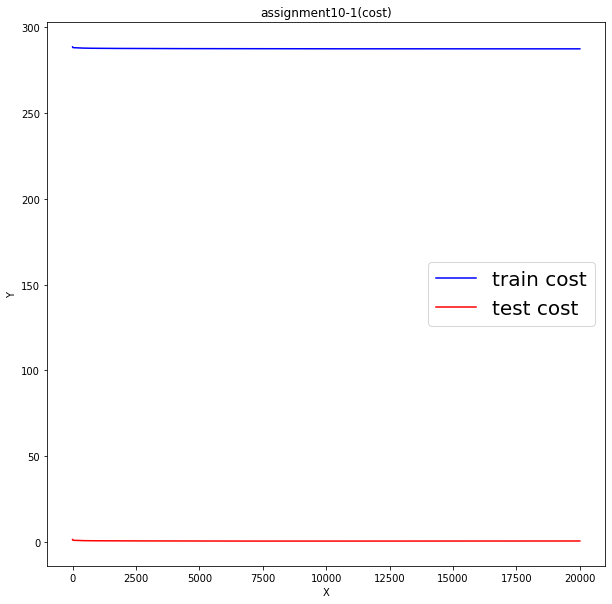

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.title("assignment10-1(cost)")
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(range(20000),cost_,color='b')
plt.plot(range(20000),cost_test_,color='r')
plt.legend(['train cost','test cost'], prop={'size': 20})
plt.show()

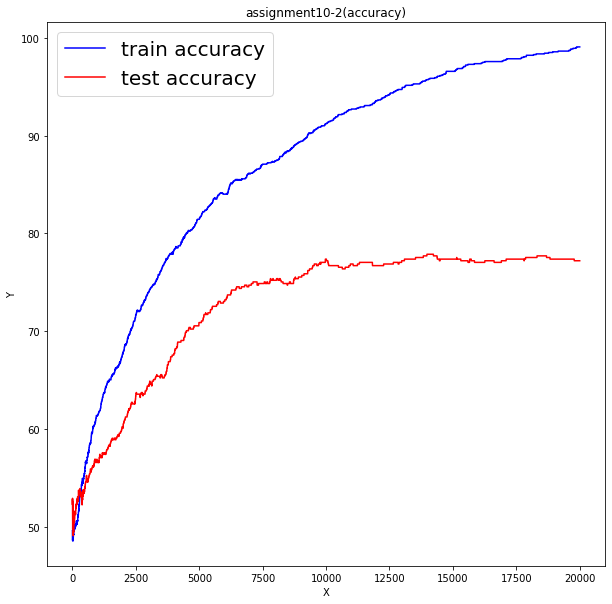

In [29]:
plt.figure(figsize=(10, 10))
plt.title("assignment10-2(accuracy)")
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(range(20000),accuracy,color='b')
plt.plot(range(20000),test_accuracy,color='r')
plt.legend(['train accuracy','test accuracy'], prop={'size': 20})
plt.show()

In [33]:
print("train accuracy :",accuracy[19999])
print("test accuracy :",test_accuracy[19999])

train accuracy : 99.07209136331193
test accuracy : 77.20465890183029


In [40]:
print(test_accuracy[19999]*len(X_test)/100)
print(484*100/len(X_test))

464.0
80.5324459234609


In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred_test = np.round(A3_test)
y_pred_train = np.round(A3)

print(confusion_matrix(y_train,y_pred_train))
print(classification_report(y_train,y_pred_train))
print(accuracy_score(y_train, y_pred_train))

print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))
print(accuracy_score(y_test, y_pred_test))


[[691   8]
 [  5 697]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       699
           1       0.99      0.99      0.99       702

    accuracy                           0.99      1401
   macro avg       0.99      0.99      0.99      1401
weighted avg       0.99      0.99      0.99      1401

0.9907209136331192
[[235  67]
 [ 70 229]]
              precision    recall  f1-score   support

           0       0.77      0.78      0.77       302
           1       0.77      0.77      0.77       299

    accuracy                           0.77       601
   macro avg       0.77      0.77      0.77       601
weighted avg       0.77      0.77      0.77       601

0.7720465890183028
